#  CS595 Assignment 3

## Dataset: New York Taxi Trip Duration 

**Description**: In this Kaggle competition dataset the aim is to build an accurate model that can predict the trip duration of a taxi cab in New York. This dataset was released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables

**Data Fields**:
* **id** - a unique identifier for each trip
* **vendor_id** - a code indicating the provider associated with the trip record
* **pickup_datetime** - date and time when the meter was engaged* 
* **dropoff_datetime** - date and time when the meter was disengaged
* **passenger_count** - the number of passengers in the vehicle (driver entered value)
* **pickup_longitude** - the longitude where the meter was engaged
* **pickup_latitude** - the latitude where the meter was engaged
* **dropoff_longitude** - the longitude where the meter was disengaged
* **dropoff_latitude** - the latitude where the meter was disengaged
* **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* **trip_duration** - duration of the trip in seconds

*NOTE: Even though there is a test dataset given, the dataset does not contain the target label values (Trip Duration). This is because the purpose of the test dataset here was to make predictions using the model trained on the training dataset and submit those predictions to the competition portal where the online system would calculate the accuracy of the prediction. So only the system and competition organizers know the true target values for the test set. I have therefore used the train dataset and split into train-test*

In [1]:
import numpy as np
import pandas as pd 
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

#Load Training Data
df = pd.read_csv("train.csv",index_col='id')
df['store_and_fwd_flag'] = LabelEncoder().fit_transform(df["store_and_fwd_flag"])# Converting strings to float 
df['pickup_datetime'] = LabelEncoder().fit_transform(df["pickup_datetime"])
df['dropoff_datetime'] = LabelEncoder().fit_transform(df["dropoff_datetime"])
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id2875421,2,551677,551464,1,-73.982155,40.767937,-73.964630,40.765602,0,455
id2377394,1,1242712,1242868,1,-73.980415,40.738564,-73.999481,40.731152,0,663
id3858529,2,132900,132995,1,-73.979027,40.763939,-74.005333,40.710087,0,2124
id3504673,2,730930,730736,1,-74.010040,40.719971,-74.012268,40.706718,0,429
id2181028,2,643836,643621,1,-73.973053,40.793209,-73.972923,40.782520,0,435


In [2]:
#Train-Test split
X_train, X_test, y_train, y_test = train_test_split(df.drop('trip_duration',axis=1), df['trip_duration'], test_size=0.33)


### Decision Tree Classifer with Depth 1 

Mean Absolute Error =  587.143118576
Mean Squared Error =  43206708.2325


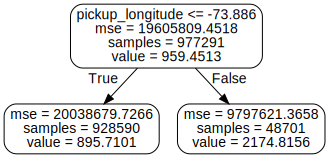

In [6]:
clf1 = DecisionTreeRegressor(max_depth=1)
clf1.fit(X_train,y_train)
pred1 = clf1.predict(X_test)

print("Mean Absolute Error = " ,metrics.mean_absolute_error(y_test,pred1))
print("Mean Squared Error = " ,metrics.mean_squared_error(y_test,pred1))

dot_data1 = tree.export_graphviz(clf1, out_file=None,feature_names = df.columns,rounded=True) 
graph1 = graphviz.Source(dot_data1) 
graph1

### Decision Tree Classifer with Depth 2

Mean Absolute Error =  582.411206161
Mean Squared Error =  43139322.7217


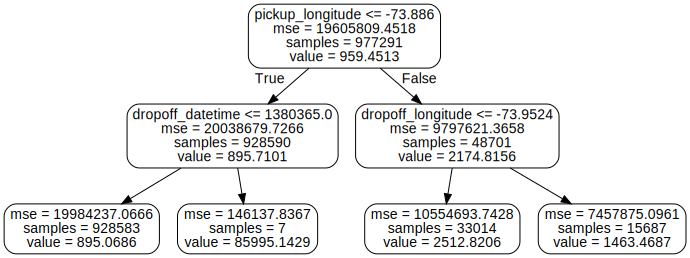

In [10]:
clf2 = DecisionTreeRegressor(max_depth=2)
clf2.fit(X_train,y_train)
pred2 = clf2.predict(X_test)

print("Mean Absolute Error = " ,metrics.mean_absolute_error(y_test,pred2))
print("Mean Squared Error = " ,metrics.mean_squared_error(y_test,pred2))

dot_data2 = tree.export_graphviz(clf2, out_file=None,feature_names = df.columns,rounded=True) 
graph2 = graphviz.Source(dot_data2) 
graph2

Mean Absolute Error =  555.064122608
Mean Squared Error =  43075416.9297


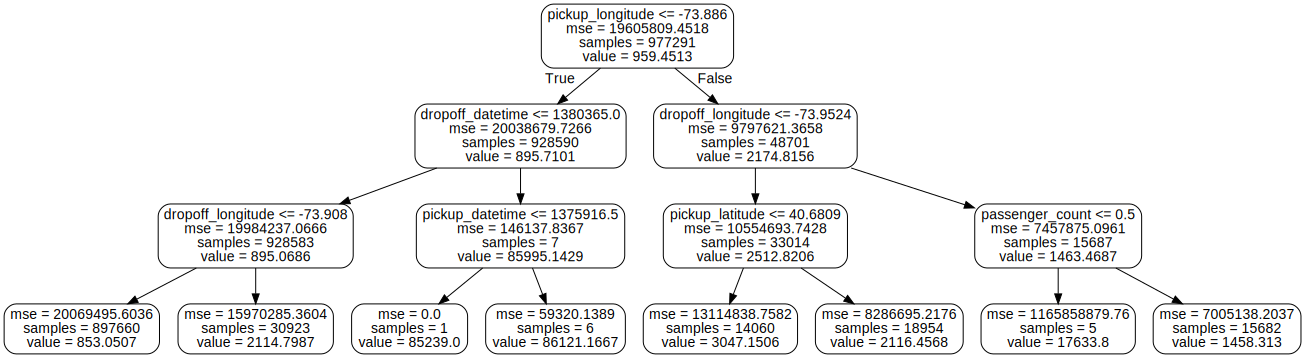

In [11]:
clf3 = DecisionTreeRegressor(max_depth=3)
clf3.fit(X_train,y_train)
pred3 = clf3.predict(X_test)

print("Mean Absolute Error = " ,metrics.mean_absolute_error(y_test,pred3))
print("Mean Squared Error = " ,metrics.mean_squared_error(y_test,pred3))

dot_data3 = tree.export_graphviz(clf3, out_file=None,feature_names = df.columns,rounded=True) 
graph3 = graphviz.Source(dot_data3) 
graph3

In [12]:
clf4 = DecisionTreeRegressor(max_depth=4)
clf4.fit(X_train,y_train)
pred4 = clf4.predict(X_test)

print("Mean Absolute Error = " ,metrics.mean_absolute_error(y_test,pred4))
print("Mean Squared Error = " ,metrics.mean_squared_error(y_test,pred4))

Mean Absolute Error =  540.620205592
Mean Squared Error =  43054133.462


In [14]:
clf5 = DecisionTreeRegressor(max_depth=5)
clf5.fit(X_train,y_train)
pred5 = clf5.predict(X_test)

print("Mean Absolute Error = " ,metrics.mean_absolute_error(y_test,pred5))
print("Mean Squared Error = " ,metrics.mean_squared_error(y_test,pred5))

Mean Absolute Error =  540.813819138
Mean Squared Error =  43037480.9021


In [13]:
clf6 = DecisionTreeRegressor(max_depth=6)
clf6.fit(X_train,y_train)
pred6 = clf6.predict(X_test)

print("Mean Absolute Error = " ,metrics.mean_absolute_error(y_test,pred6))
print("Mean Squared Error = " ,metrics.mean_squared_error(y_test,pred6))

Mean Absolute Error =  538.890339838
Mean Squared Error =  42665929.2822
